<a href="https://colab.research.google.com/github/Gianuzzi/Proc_de_Img_-DD2020/blob/main/Ejercicio2.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libs

In [ ]:
# Libs (no tocar)
import os
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    from subprocess import getoutput
    getoutput("git clone -l -s https://gist.github.com/Gianuzzi/8500100a094ade398c55b827e55c6a3a cloned-repo")
    os.chdir('cloned-repo')
    import libs_PI
    os.chdir('/content')
    
from libs_PI import *

# Carga de imagen

Se debe otorgar el ``path`` al archivo. Puede ser un path del ordenador, o la URL de la imagen.

En caso de que sea una URL, debe estar permitido el acceso a ella; de caso contrario, surgirá un error [HTTP_403](https://es.wikipedia.org/wiki/HTTP_403)

Por Default se intenta leer una imagen JPG; en caso de que sea otro formato, especificarlo. 

Formatos disponibles: **['png',  'jpeg', 'webp', 'bmp', 'dib', 'jpe', 'jp2',  'pbm', 'pgm', 'ppm', 'pxm', 'jpg', 'pnm']**

Se normaliza la imagen.
Tamaño de la imagen: (375, 500, 3)


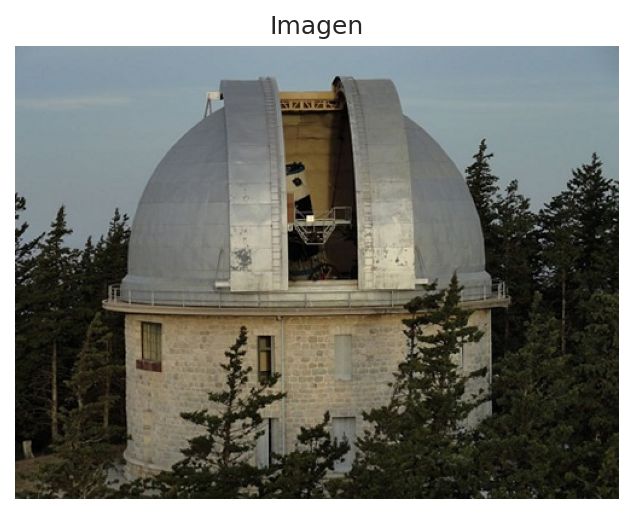

In [ ]:
# Definir path y formato
path    = 'https://www.redaccionaltagracia.com.ar/wp-content/uploads/2014/06/observatorio-bosque-alegre.jpg'
formato = 'jpg'


# Si estamos en colab, debe ser un URL.
if in_colab:
    from urllib.request import urlopen
    try:
        urlopen(path)
        getoutput("wget -O Imagen " + path)
        path = os.path.join(os.getcwd(), 'Imagen')
    except:
        print('No se pudo descargar la imagen.')
        print('Puede que la URL está mal escrita,'+ \
              ' o que el acceso a ella esté prohibido.')

# Cargamos el archivo
img = mpimg.imread(path, format=formato)

# Definimos RGB normalizado
if img.ravel().dtype not in (float, 'float32'): 
    print('Se normaliza la imagen.')
    img = img / 255.
if (len(img.shape)==3) and (img.shape[2]==4):
    img = RGBAtoRGB(img, verb=True)
print('Tamaño de la imagen:', img.shape) 

# Luminancias?
lum  = True if len(img.shape)==2 else False
if lum: print('Parece que la imagen no presenta colores.\n'+\
              'Se considera que es una imagen de luminancias.')
    
# Ploteo
plt.figure(dpi=150)
plt.title('Imagen')
plt.axis('off')
plt.imshow(img, plt.cm.gray)
plt.show()

# Obtención de Y

Para este práctico, se trabajará con las luminancias.

Se ha transformado de RGB a YIQ


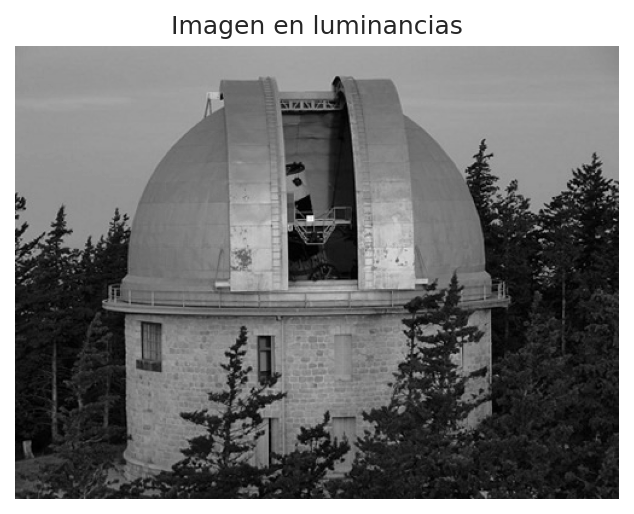

In [ ]:
if not lum:                                     # Si tiene colores...
    YIQ = RGBtoYIQ(img, normed=True, verb=True) # Pasamos a YIQ
    Y   = YIQ[:,:,0]                            # Obtenemos Y
else: Y = img

if not lum:  #Plot
    plt.figure(dpi=150)
    plt.title('Imagen en luminancias')
    plt.axis('off')
    plt.imshow(Y, plt.cm.gray)
    plt.show()

# Procesamiento morfológico


Parámetros:

    n        : Ancho fijo de matriz del kernel nxn.
                Debe ser un número natural impar mayor que 1. (int)
    operation: Nombre de la operación a realizar. (str)
                Las posibles son:
                 - 'identidad' (retorna a imagen original)
                 - 'erosion'
                 - 'dilatacion'
                 - 'apertura'
                 - 'cierre'
                 - 'borde_exterior', 'borde_ext'
                 - 'borde_interior', 'borde_int'
                 - 'mediana', 'median'
                 - 'top_hat'
                 - 'bottom_hat'
                 - 'gradiente'
                 - 'media', 'mean'
                 
El _tamaño_ del kernel es seteado al inicio, y no se cambia durante la ejecución.

La _operación_ se puede modificar _on the fly_ (durante la ejecución). La imagen utilizada para la operación siguente, es el resultado de la operación anterior.
En caso de introducir _operacion:_ **identidad**, se vuelve a la imagen original.   

Introduzca el ancho del kernel:5
Introduzca la operación a realizar:apertura
Se ha aplicado la operación apertura, con un kernel 5x5.


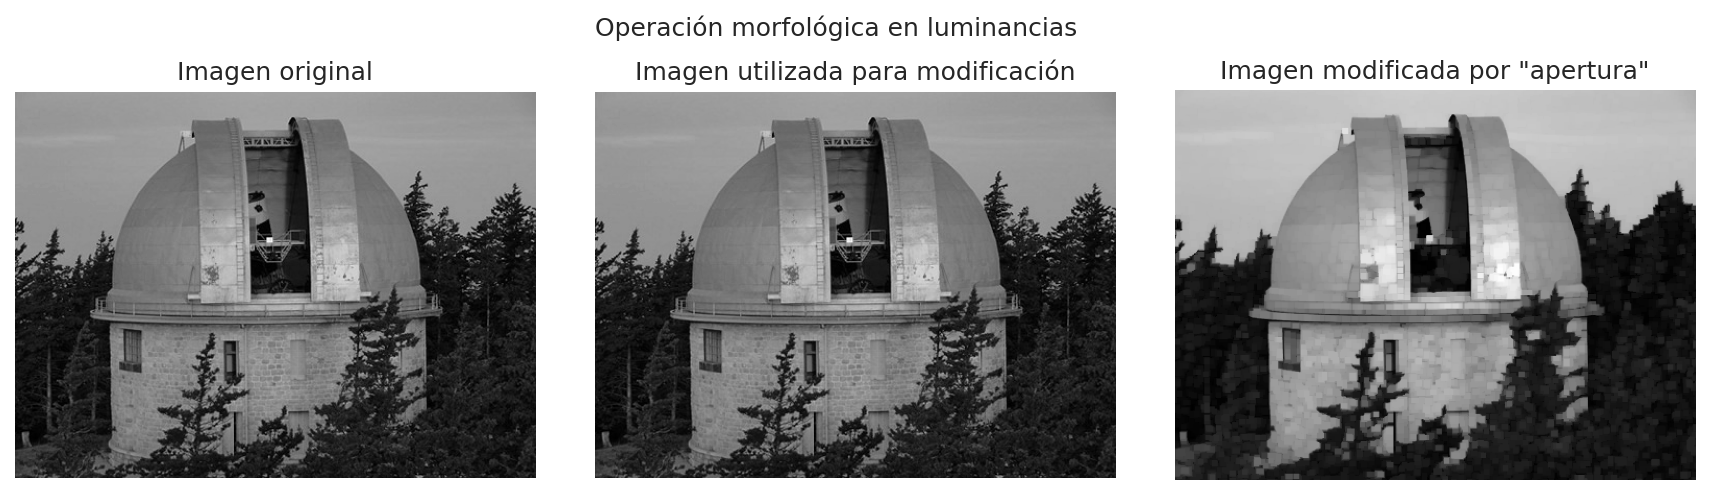

¿Desea continuar? [Y/N]y
Introduzca la operación a realizar:Dilatacion
Se ha aplicado la operación dilatacion, con un kernel 5x5.


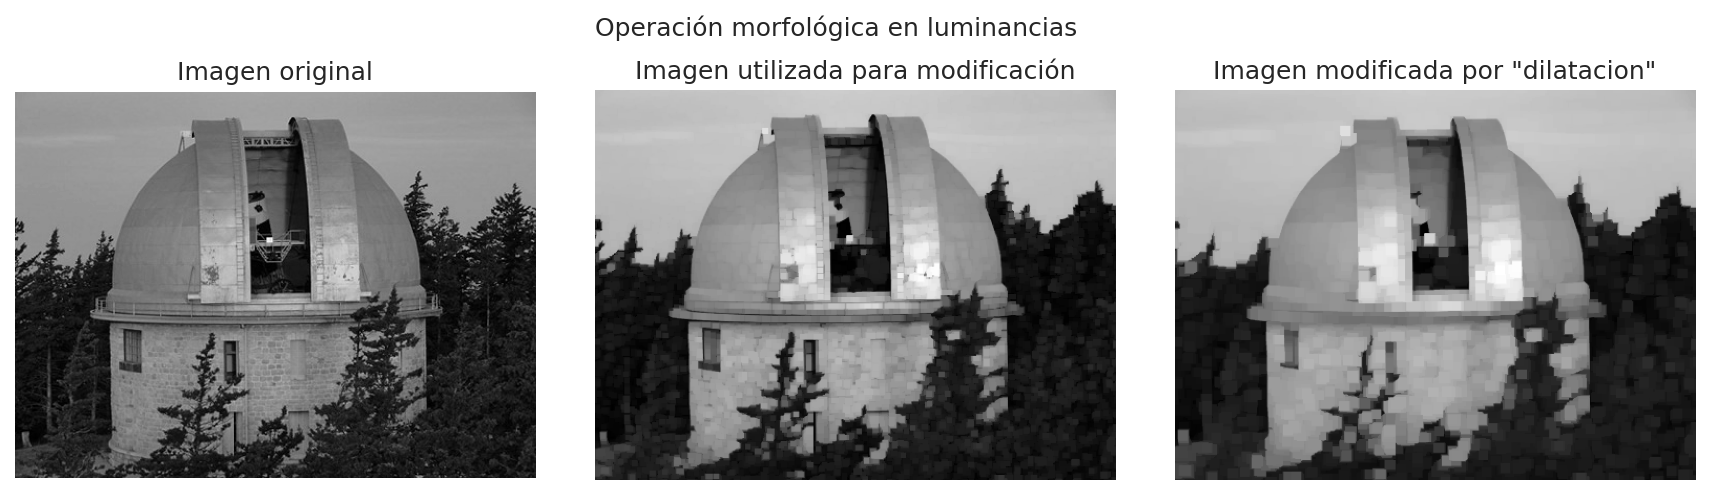

¿Desea continuar? [Y/N]y
Introduzca la operación a realizar:identidad
Retornando a imagen original.
Se ha aplicado la operación identidad, con un kernel 5x5.


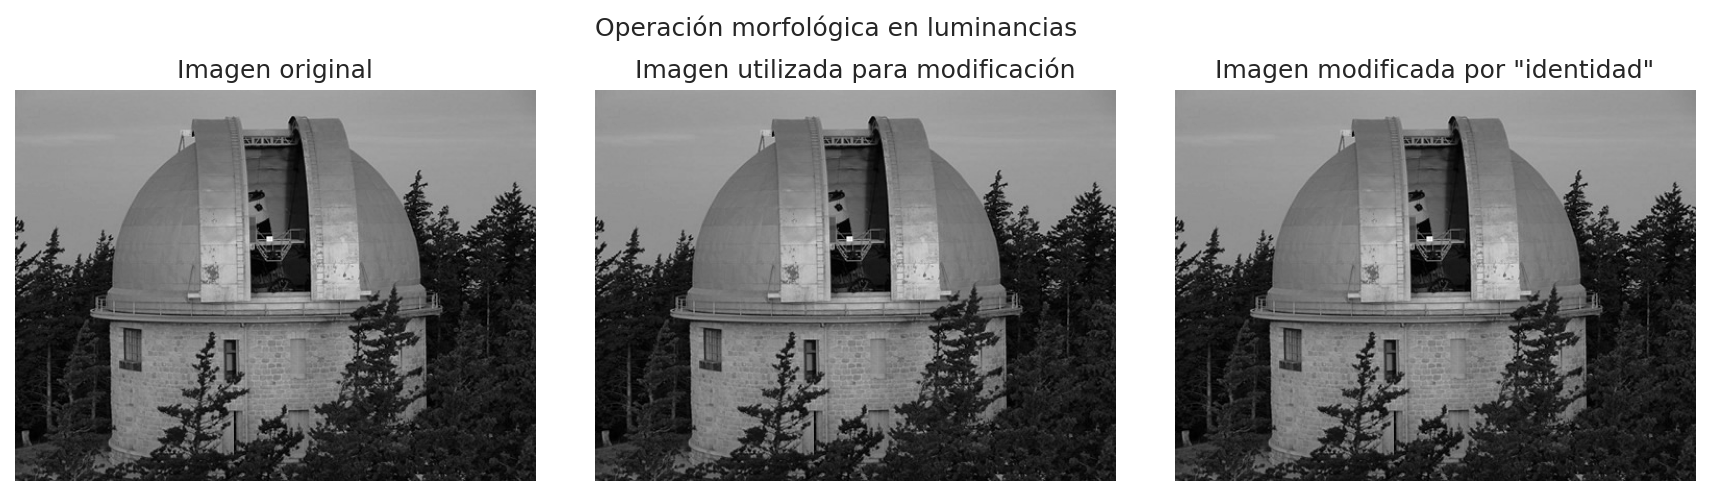

¿Desea continuar? [Y/N]y
Introduzca la operación a realizar:gradiente
Se ha aplicado la operación gradiente, con un kernel 5x5.


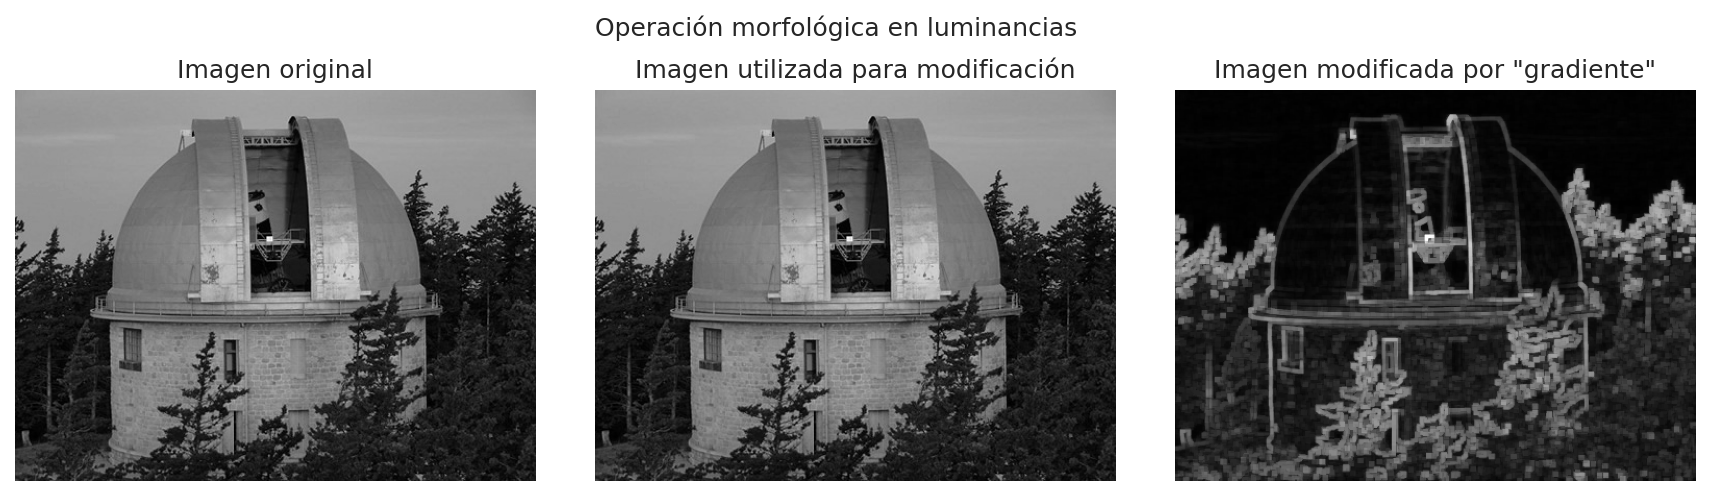

¿Desea continuar? [Y/N]n
Muchas gracias.


In [ ]:
Y_f = ApplyMorfOp(Y)

# Guardado

Se debe especificar el nombre y formato. Se guardará la imagen en luminancias.

In [ ]:
nombre  = 'IMG_Ej2.2'
formato = 'jpg'

if not in_colab:
    RGB_f = (Y_f*255.).astype('uint8')
    IMG   = Image.fromarray(RGB_f)
    IMG.save(nombre+'.'+formato)